In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
Balance_Sheet = ["Reserves and Surplus",
                 "Total Assets",
                 "Total Capital And Liabilities",
                 "Total Current Assets",
                 "Total Current Liabilities",
                 "Total Non-Current Assets",
                 "Total Reserves and Surplus",
                 "Total Share Capital",
                 "Total Shareholders Funds",
                 "Fixed Assets",
                 "Other Current Liabilities",
                 "Tangible Assets"]
Cash_Flow = ["Cash And Cash Equivalents Begin of Year",
             "Cash And Cash Equivalents End Of Year",
             "Net Cash Used In Investing Activities",
             "Net CashFlow From Operating Activities",
             "Net Profit/Loss Before Extraordinary Items And Tax",
             "Net Inc/Dec In Cash And Cash Equivalents",
             "Net Cash Used From Financing Activities",
             "Foreign Exchange Gains / Losses"]

Profit_Loss = ["Basic EPS (Rs.)",
               "Diluted EPS (Rs.)",
               "Employee Benefit Expenses",
               "Other Expenses",
               "Profit/Loss After Tax And Before ExtraOrdinary Items",
               "Profit/Loss Before Exceptional, ExtraOrdinary Items And Tax",
               "Profit/Loss Before Tax",
               "Profit/Loss For The Period","Profit/Loss From Continuing Operations",
               "Revenue From Operations [Gross]",
               "Revenue From Operations [Net]",
               "Total Expenses","Total Operating Revenues",
               "Total Revenue",
               "Other Income",
               "Depreciation And Amortisation Expenses",
               "Total Tax Expenses",
               "Deferred Tax",
               "Finance Costs",
               "Current Tax",
               "Operating And Direct Expenses"]

Ratio = ["Net Profit Margin (%)",
         "Net Profit/Share (Rs.)",
         "PBDIT Margin (%)",
         "PBDIT/Share (Rs.)",
         "PBIT Margin (%)",
         "PBIT/Share (Rs.)",
         "PBT Margin (%)",
         "PBT/Share (Rs.)",
         "Return on Assets (%)",
         "Return on Networth / Equity (%)",
         "Revenue from Operations/Share (Rs.)",
         "EV/EBITDA (X)","Enterprise Value (Cr.)",
         "Dividend Payout Ratio (CP) (%)",
         "Dividend Payout Ratio (NP) (%)",
         "Earnings Retention Ratio (%)",
         "Total Debt/Equity (X)"]

Year = ["Equity Share Capital",
        "Net Profit/(Loss) For the Period",
        "Other Expenses",
        "P/L After Tax from Ordinary Activities",
        "P/L Before Exceptional Items & Tax",
        "P/L Before Int., Excpt. Items & Tax",
        "P/L Before Other Inc. , Int., Excpt. Items & Tax",
        "P/L Before Tax","Employees Cost",
        "Net Sales/Income from operations",
        "Total Income From Operations",
        "Basic EPS","Basic EPS.",
        "Diluted EPS","Diluted EPS.",
        "depreciat",
        "Other Income",
        "Interest","Tax"]

Quarterly = ["Equity Share Capital",
        "Net Profit/(Loss) For the Period",
        "Other Expenses",
        "P/L After Tax from Ordinary Activities",
        "P/L Before Exceptional Items & Tax",
        "P/L Before Int., Excpt. Items & Tax",
        "P/L Before Other Inc. , Int., Excpt. Items & Tax",
        "P/L Before Tax","Employees Cost",
        "Net Sales/Income from operations",
        "Total Income From Operations",
        "Basic EPS","Basic EPS.",
        "Diluted EPS","Diluted EPS.",
        "depreciat",
        "Other Income",
        "Interest","Tax"]

,Balance Sheet of 3i Infotech(in Rs. Cr.),Equity Share Capital,Total Share Capital,Reserves and Surplus,Total Reserves and Surplus,Total Shareholders Funds,Long Term Borrowings,Other Long Term Liabilities,Total Non-Current Liabilities,Short Term Borrowings,...,Cash And Cash Equivalents,Short Term Loans And Advances,OtherCurrentAssets,Total Current Assets,Total Assets,Contingent Liabilities,Expenditure In Foreign Currency,Other Earnings,Bonus Equity Share Capital,Non-Current Investments Unquoted Book Value
0,Mar 05,31.00,181.00,29.91,29.91,210.92,130.67,264.67,149.54,11.19,...,9.37,100.54,0.08,167.60,447.06,6.17,50.16,0.62,20.00,86.65
1,Mar 06,53.05,153.05,219.17,219.17,372.22,294.74,264.67,317.31,20.64,...,249.46,111.43,65.41,469.27,801.31,13.16,84.04,0.26,20.00,100.94
2,Mar 07,56.30,156.30,305.35,305.35,461.65,533.43,264.67,536.96,12.59,...,65.17,200.54,65.41,375.38,1131.73,52.47,103.81,6.89,20.00,591.72
3,Mar 08,130.54,230.54,414.45,414.45,644.98,1240.10,264.67,1253.77,22.01,...,37.06,410.32,65.41,577.40,2069.52,16.92,123.21,13.15,84.79,1204.36
4,Mar 09,130.75,230.75,515.90,515.90,746.65,1408.81,264.67,1443.82,112.17,...,99.15,417.40,37.33,690.29,2657.52,88.77,92.54,148.42,84.79,1455.42
5,Mar 10,168.76,268.76,626.34,626.34,895.10,1429.63,264.67,1429.63,178.47,...,44.74,486.88,15.00,796.69,2845.11,28.53,20.31,168.69,84.79,1724.84
6,Mar 11,191.99,291.99,776.25,776.25,1068.24,1038.82,155.46,1194.28,509.29,...,108.86,482.79,73.46,861.95,3270.15,747.78,19.76,173.91,84.79,1969.78
7,Mar 12,191.99,291.99,372.29,372.29,664.28,1693.57,203.23,1896.80,216.10,...,40.26,134.02,313.00,569.33,3578.55,518.20,4.81,358.26,84.79,2019.20
8,Mar 13,571.55,636.55,397.11,397.11,1033.66,1958.49,32.52,1991.01,6.00,...,13.87,108.91,30.84,251.04,4003.04,403.73,1.73,40.60,84.79,1533.88
9,Mar 14,572.64,637.64,-40.34,-40.34,597.30,2062.93,1002.31,3065.24,185.19,...,16.50,41.67,29.57,697.70,4488.99,435.03,42.14,41.17,84.79,1533.88


In [ ]:
input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Excel\Balance-sheet_combined.xlsx"
output_file = 

<Axes: ylabel='count'>

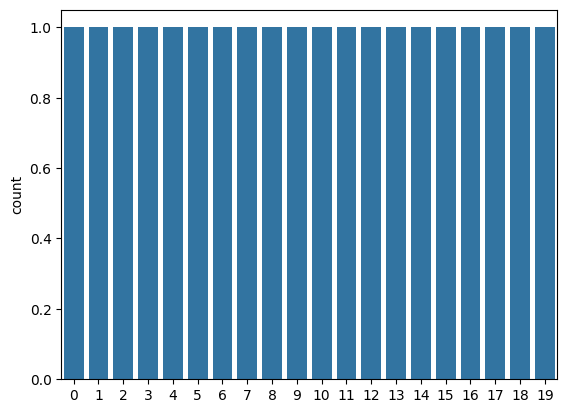

In [4]:
sns.countplot(df["Equity Share Capital"])